# **Overview**

Credit card fraud is a serious issue that both consumers and businesses face. Fraudulent activities can result in significant financial losses for both parties and can harm the reputation of businesses that fall victim to them. Credit card fraud detection systems have been developed to assist in detecting and preventing fraudulent transactions.  

These systems analyze transaction data and look for potential fraud using sophisticated algorithms and machine learning techniques. They look at a wide range of variables, including the type of transaction, the amount, the frequency, and the location of the transaction. The system calculates a risk score for each transaction based on this analysis, indicating the likelihood of fraud.  

When a transaction is deemed to be high risk, the system can either automatically flag it for additional review or reject it outright. Credit card fraud detection systems can also track customer behavior and spot patterns of fraud over time, giving businesses the opportunity to take action before suffering significant losses.  

Credit card fraud detection is a critical tool for protecting consumers and businesses from the financial and reputational damage caused by fraudulent activities. By leveraging advanced technology and analytics, these systems are helping to prevent fraud and ensure the integrity of the credit card industry.


# **1. Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file = '/content/drive/MyDrive/Dataset/creditcard.csv'

In [4]:
df = pd.read_csv(file)

In [5]:
pd.options.display.max_columns = None

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


The "time" column first refers to the dataset's documentation before referencing the proportional number of seconds that have passed since the dataset's first transaction.

The parameters "V1" through "V28" are concealed to protect the privacy of the data. Since all of these values are expressed numerically throughout the dataset, it is not necessary to understand what they each individually mean in order to use them.

The transaction's amount is indicated by the term "Amount."

A transaction's "Class" indicates whether it was fraudulent or not (0 = not fraudulent, and 1 = fraudulent).

# **2. Exploratory Data Analysis**

In [6]:
# statistical description

df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [7]:
# features type
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# Dataset size

print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Rows : 284807
Columns : 31


In [9]:
# missing data

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
# Class balance

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df.groupby('Class').mean().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.0,0.01,-0.00,0.00,0.01,-0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29
1,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.4,-5.57,0.57,-2.58,-5.68,3.80,-6.26,-0.11,-6.97,-0.09,-4.14,-6.67,-2.25,0.68,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21


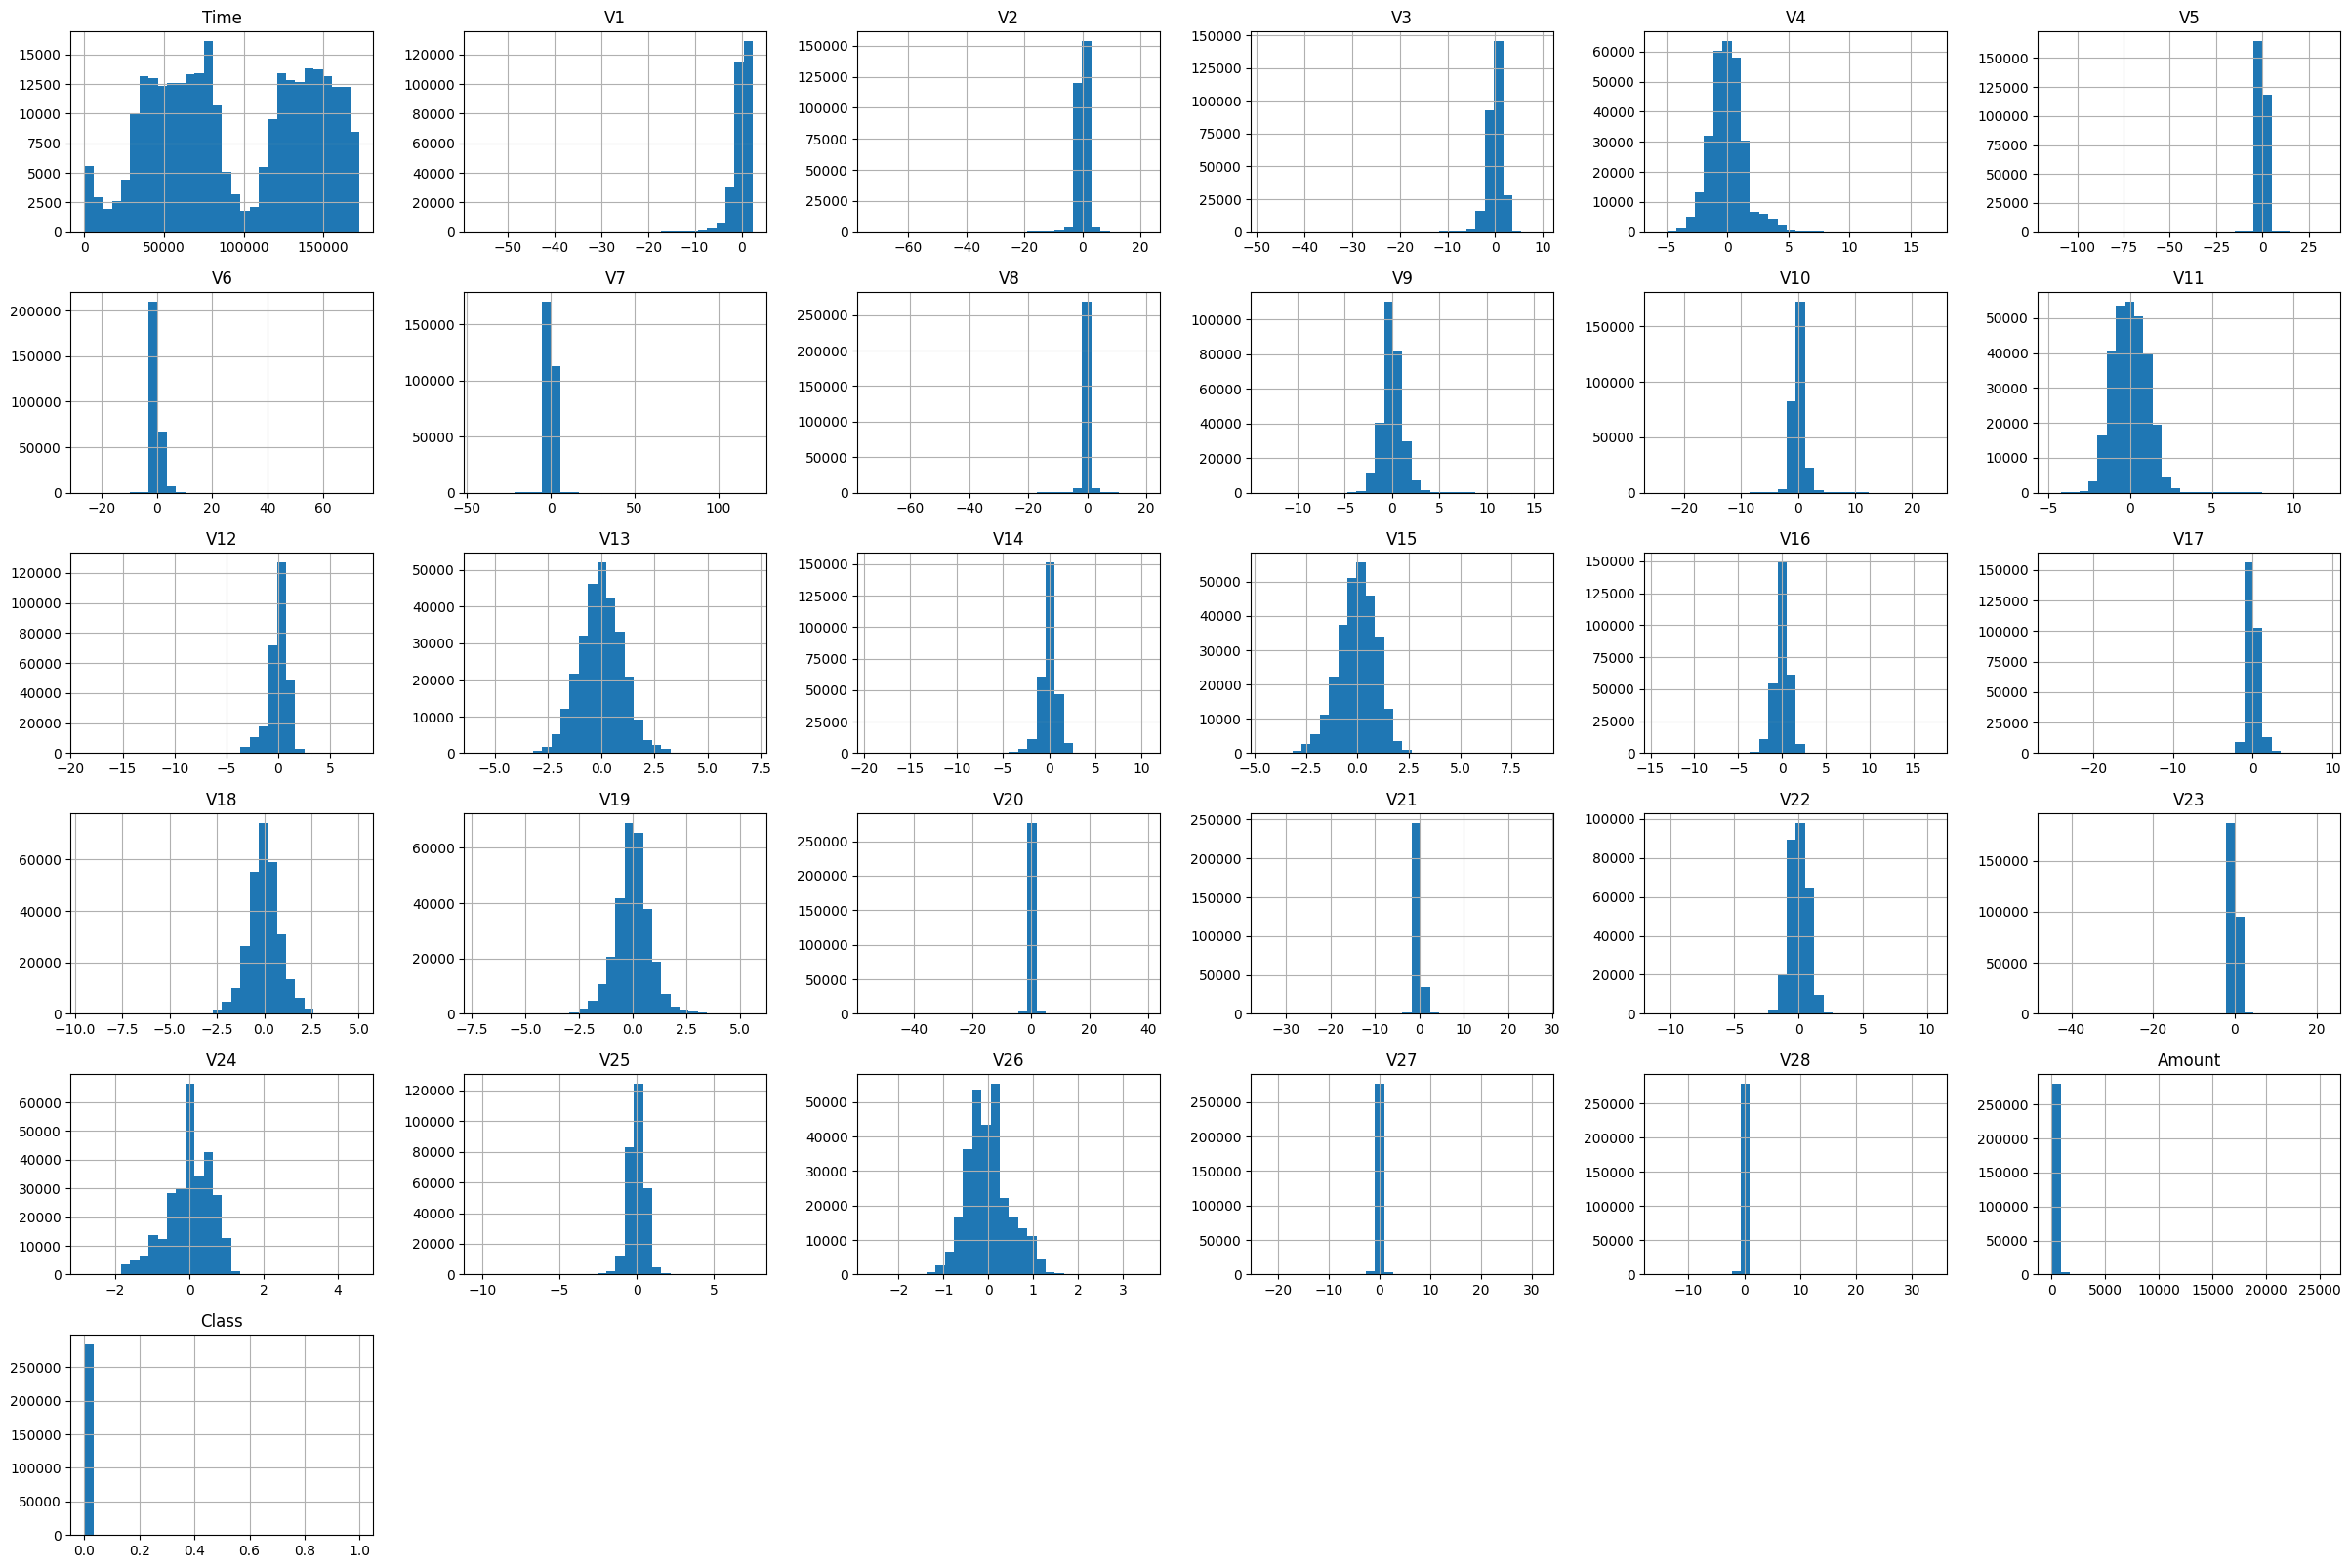

In [12]:
df.hist(figsize=(30,20),bins = 30)
plt.title("Features Distribution")
plt.show()

In [13]:
from phik import phik_matrix

# correlation value with PhiK according to Class
phik_value = df.phik_matrix().Class
phik_value_above_threshold = phik_value[phik_value > 0.4].round(2)
phik_value_above_threshold.sort_values(ascending=False, inplace=True)

# print the features above the threshold
print("Features with PhiK correlation above 0.4:")
for feature, value in phik_value_above_threshold.items():
    print(f"{feature}: {value}")


interval columns not set, guessing: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Features with PhiK correlation above 0.4:
Class: 1.0
V17: 0.86
V12: 0.83
V14: 0.83
V11: 0.78
V10: 0.71
V18: 0.65
V16: 0.58
V9: 0.5
V4: 0.48


A Phi-K matrix is a table that displays all potential binary variable pairs in a dataset and the strength and direction of their potential associations. The Phi-K coefficient ranges from -1 to +1, with closer values to -1 or +1 indicating a stronger association between the variables and closer values to 0 indicating a weaker or no association.  

Writers choose threshold 0.4 as a margin of binary variable, a Phi-K coefficient value greater than 0.4 will be regarded as having a strong association when a threshold above 0.4 is chosen. Binary variable pairs with a Phi-K coefficient value less than 0.4 are regarded as having no or a weak association.

The writer will choose those feature above threshold 0.4 to form a new dataframe that similar to original. This method can be used to reduce the dimensionality of a dataset by identifying pairs of binary variables that are strongly associated with each other. This can be achieved by selecting only those pairs of variables with a Phi-K coefficient value above a certain threshold, and discarding the rest.

# **3. Undersampling**

Undersampling the class is a technique used in machine learning to balance imbalanced datasets, where one class has significantly fewer examples than the other. This technique involves randomly removing examples from the majority class until both classes have approximately the same number of examples.

Undersampling can be effective in reducing the impact of class imbalance on the performance of machine learning models. By reducing the number of examples in the majority class, the model can focus more on learning the patterns and characteristics of the minority class, which can improve its ability to correctly classify examples from that class.

In [14]:
# separate data into each class

non_fraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [15]:
print('non_fraud :', non_fraud.shape)
print('fraud :', fraud.shape)

non_fraud : (284315, 31)
fraud : (492, 31)


In [16]:
non_fraud.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.0
mean,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,0.01,-0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29,0.0
std,47484.02,1.93,1.64,1.46,1.40,1.36,1.33,1.18,1.16,1.09,1.04,1.00,0.95,1.00,0.90,0.92,0.84,0.75,0.82,0.81,0.77,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.11,0.0
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-31.76,-73.22,-6.29,-14.74,-4.80,-15.14,-5.79,-18.39,-4.39,-10.12,-17.10,-5.37,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.0
25%,54230.00,-0.92,-0.60,-0.88,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.53,-0.76,-0.40,-0.65,-0.42,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.65,0.0
50%,84711.00,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.06,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.0
75%,139333.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.46,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.05,0.0
max,172792.00,2.45,18.90,9.38,16.88,34.80,73.30,120.59,18.71,15.59,23.75,10.00,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,22.61,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,0.0


In [17]:
fraud.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.0
mean,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,-5.68,3.80,-6.26,-0.11,-6.97,-0.09,-4.14,-6.67,-2.25,0.68,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21,1.0
std,47835.37,6.78,4.29,7.11,2.87,5.37,1.86,7.21,6.80,2.50,4.90,2.68,4.65,1.10,4.28,1.05,3.87,6.97,2.90,1.54,1.35,3.87,1.49,1.58,0.52,0.80,0.47,1.38,0.55,256.68,0.0
min,406.00,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,-24.59,-1.70,-18.68,-3.13,-19.21,-4.50,-14.13,-25.16,-9.50,-3.68,-4.13,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87,0.00,1.0
25%,41241.50,-6.04,1.19,-8.64,2.37,-4.79,-2.50,-7.97,-0.20,-3.87,-7.76,1.97,-8.69,-0.98,-9.69,-0.64,-6.56,-11.95,-4.66,-0.30,-0.17,0.04,-0.53,-0.34,-0.44,-0.31,-0.26,-0.02,-0.11,1.00,1.0
50%,75568.50,-2.34,2.72,-5.08,4.18,-1.52,-1.42,-3.03,0.62,-2.21,-4.58,3.59,-5.50,-0.07,-6.73,-0.06,-3.55,-5.30,-1.66,0.65,0.28,0.59,0.05,-0.07,-0.06,0.09,0.00,0.39,0.15,9.25,1.0
75%,128483.00,-0.42,4.97,-2.28,6.35,0.21,-0.41,-0.95,1.76,-0.79,-2.61,5.31,-2.97,0.67,-4.28,0.61,-1.23,-1.34,0.09,1.65,0.82,1.24,0.62,0.31,0.29,0.46,0.40,0.83,0.38,105.89,1.0
max,170348.00,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,4.03,12.02,1.38,2.82,3.44,2.47,3.14,6.74,3.79,5.23,11.06,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78,2125.87,1.0


In [18]:
non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [19]:
# undersample the fraud class which has similar distribution

non_fraud_us = non_fraud.sample(n=492)

In [20]:
non_fraud_us.shape

(492, 31)

In [21]:
# concatenate undersample fraud data and non-fraud data

df_us = pd.concat([non_fraud_us, fraud], axis=0).reset_index()

In [22]:
print('non_fraud :', df_us[df_us.Class == 0].shape)
print('fraud :', df_us[df_us.Class == 1].shape)

non_fraud : (492, 32)
fraud : (492, 32)


In [23]:
df_us.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [24]:
# before undersample
df.groupby('Class').mean().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.0,0.01,-0.00,0.00,0.01,-0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29
1,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.4,-5.57,0.57,-2.58,-5.68,3.80,-6.26,-0.11,-6.97,-0.09,-4.14,-6.67,-2.25,0.68,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21


In [25]:
# after undersample
df_us.groupby('Class').mean().round(2)

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,138233.60,92513.43,-0.02,-0.04,0.06,-0.06,0.01,0.03,-0.03,-0.09,0.02,-0.03,0.01,0.06,0.02,0.02,-0.03,0.03,-0.00,-0.01,0.04,0.02,0.05,-0.01,0.06,-0.02,-0.03,0.04,0.02,0.01,91.90
1,119295.06,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,-5.68,3.80,-6.26,-0.11,-6.97,-0.09,-4.14,-6.67,-2.25,0.68,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21


In [26]:
# Phik correlation above threshold 0.5 according to Class
best_feature = ['Class', 'V17', 'V12', 'V14', 'V11', 'V10', 'V18', 'V16', 'V9', 'V4', 'Amount']

# assign to new dataframe
df_us2 = df_us[best_feature]

In [27]:
df_us2

,Class,V17,V12,V14,V11,V10,V18,V16,V9,V4,Amount
0,0,-0.297543,-1.511434,1.032737,2.625820,0.190263,0.198130,0.556810,1.636169,-1.262667,35.13
1,0,1.930841,2.398660,4.261900,-3.165712,0.312736,0.478225,1.268396,-0.929622,0.813260,4.74
2,0,-0.994091,0.267508,0.534923,0.409637,0.181489,0.925183,0.613881,0.030667,0.854983,29.38
3,0,-0.449681,0.951636,0.668280,1.266711,-0.859331,0.318570,-0.216942,1.005353,-1.595183,18.00
4,0,-0.080563,-0.441721,-0.196245,-0.020006,1.565151,0.507423,-0.127571,-2.174939,-1.879861,40.00
...,...,...,...,...,...,...,...,...,...,...,...
979,1,-4.570529,-5.417424,-6.665177,2.115795,-5.587794,-1.315147,-2.897825,-2.064945,1.749293,390.00
980,1,-3.267116,-3.096915,-5.210141,2.858466,-3.232153,-0.688505,-2.155297,-1.127396,1.411850,0.76
981,1,-5.035326,-2.775022,-4.057162,1.794969,-3.463891,-0.507000,-1.603015,-0.652250,0.468308,77.89
982,1,-4.614717,-5.030465,-6.416628,1.933520,-5.245984,-1.478138,-2.549498,-1.632333,1.817092,245.00


# **4. Preprocessing**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [29]:
df_scaled = pd.DataFrame(np.concatenate([df_us2[['Class']], 
                                         pd.DataFrame(MinMaxScaler().fit_transform(df_us2.drop('Class', axis=1)))], 
                                        axis=1), 
                         columns=['Class']+df_us2.drop('Class', axis=1).columns.tolist())

df_scaled.Class = df_scaled.Class.astype(int)

In [30]:
df_scaled

,Class,V17,V12,V14,V11,V10,V18,V16,V9,V4,Amount
0,0,0.779422,0.814533,0.862450,0.381408,0.830042,0.716877,0.850439,0.798427,0.163325,0.011263
1,0,0.849272,1.000000,1.000000,0.000000,0.834144,0.737584,0.891644,0.662490,0.293162,0.001520
2,0,0.757588,0.898913,0.841245,0.235459,0.829748,0.770627,0.853744,0.713367,0.295771,0.009420
3,0,0.774653,0.931363,0.846925,0.291902,0.794882,0.725781,0.805634,0.765006,0.142528,0.005771
4,0,0.786223,0.865272,0.810100,0.207164,0.876098,0.739743,0.810810,0.596513,0.124723,0.012825
...,...,...,...,...,...,...,...,...,...,...,...
979,1,0.645482,0.629260,0.534547,0.347819,0.636486,0.605003,0.650397,0.602340,0.351705,0.125040
980,1,0.686338,0.739328,0.596526,0.396729,0.715396,0.651329,0.693393,0.652012,0.330600,0.000244
981,1,0.630912,0.754597,0.645639,0.326691,0.707633,0.664748,0.725373,0.677185,0.271587,0.024973
982,1,0.644096,0.647614,0.545134,0.335815,0.647936,0.592953,0.670567,0.625260,0.355946,0.078551


# **5. Model Building**

## LazyPredict

LazyPredict is a Python library that allows for quick and easy evaluation of multiple machine learning models on a given dataset. It automates the entire machine learning process, from data preparation to model selection and evaluation. LazyPredict uses a lazy learning approach and supports a wide variety of classification and regression models. It provides several evaluation metrics and helpful visualizations for comparing the performance of different models.

In [31]:
# Installing the library
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Importing machine learning model dependencies
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [33]:
x = df_scaled.drop('Class', axis=1)
y = df_scaled.Class

In [34]:
# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [35]:
# Creating model(s) and fitting them to partitioned training data
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00,  9.98it/s]


In [36]:
# Getting the models that performed the best in the partition set
models.sort_values(by='Accuracy', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.31
KNeighborsClassifier,0.93,0.93,0.93,0.93,0.04
LabelPropagation,0.93,0.93,0.93,0.93,0.10
LabelSpreading,0.93,0.93,0.93,0.93,0.13
AdaBoostClassifier,0.93,0.93,0.93,0.93,0.54
SGDClassifier,0.93,0.93,0.93,0.93,0.02
LinearSVC,0.93,0.93,0.93,0.93,0.05
SVC,0.93,0.93,0.93,0.93,0.03
CalibratedClassifierCV,0.93,0.93,0.93,0.93,0.21


## Support Vector Machine

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly']}

# create an SVM object
svm = SVC()

# create a GridSearchCV object with 5-fold cross-validation
gridsearch_svc = GridSearchCV(svm, param_grid, cv=5, verbose=1, n_jobs=-1)

# fit the GridSearchCV object to the training data
gridsearch_svc.fit(x_train, y_train)

# use the best hyperparameters to fit the SVM to the training data
svm_best = gridsearch_svc.best_estimator_
svm_best.fit(x_train, y_train)

# use the fitted SVM to predict on the train data
y_pred_svc_train = svm_best.predict(x_train)

# use the fitted SVM to predict on the test data
y_pred_svc_test = svm_best.predict(x_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [38]:
from sklearn.metrics import classification_report

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters:", gridsearch_svc.best_params_)
print("Best mean cross-validation score:", gridsearch_svc.best_score_)

# Print classification report
print("\nXGB Train Classification Report:")
print(classification_report(y_train, y_pred_svc_train), '\n')
print("XGB Test Classification Report:")
print(classification_report(y_test, y_pred_svc_test))

Best hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'linear'}
Best mean cross-validation score: 0.9462075531577276

XGB Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       342
           1       0.98      0.91      0.94       346

    accuracy                           0.94       688
   macro avg       0.95      0.94      0.94       688
weighted avg       0.95      0.94      0.94       688
 

XGB Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       150
           1       0.97      0.89      0.93       146

    accuracy                           0.93       296
   macro avg       0.94      0.93      0.93       296
weighted avg       0.94      0.93      0.93       296



## XGBoost Classifier

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': np.arange(2,5),
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 75, 100, 125, 150],
    'min_child_weight': [1, 2, 3]
}

# Initialize XGBClassifier and GridSearchCV
xgb_clf = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, n_jobs=-1)

# Fit the model on training data and obtain the best estimator
grid_search_xgb.fit(x_train, y_train)
best_xgb_clf = grid_search_xgb.best_estimator_

# Generate predictions on train data
y_pred_xgb_train = best_xgb_clf.predict(x_train)

# Generate predictions on test data
y_pred_xgb_test = best_xgb_clf.predict(x_test)


In [40]:
from sklearn.metrics import classification_report

# Print best parameters and best score
print("Best Parameters: ", grid_search_xgb.best_params_)

# Print classification report
print("\nXGB Train Classification Report:")
print(classification_report(y_train, y_pred_xgb_train), '\n')
print("XGB Test Classification Report:")
print(classification_report(y_test, y_pred_xgb_test))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50}

XGB Train Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       342
           1       1.00      0.94      0.97       346

    accuracy                           0.97       688
   macro avg       0.97      0.97      0.97       688
weighted avg       0.97      0.97      0.97       688
 

XGB Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       150
           1       0.94      0.89      0.92       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'saga']}

# Initialize the logistic regression model
logreg = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search_logreg.fit(x_train, y_train)
best_logreg_clf = grid_search_logreg.best_estimator_

# Generate predictions on train data
y_pred_logreg_train = best_logreg_clf.predict(x_train)

# Generate predictions on test data
y_pred_logreg_test = best_logreg_clf.predict(x_test)


In [42]:
# Print best parameters and best score
print("Best Parameters: ", grid_search_logreg.best_params_)

# Print classification report
print("\nLogistic Regression Train Classification Report:")
print(classification_report(y_train, y_pred_logreg_train), '\n')
print("Logistic Regression Test Classification Report:")
print(classification_report(y_test, y_pred_logreg_test))

Best Parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       342
           1       0.98      0.92      0.95       346

    accuracy                           0.95       688
   macro avg       0.95      0.95      0.95       688
weighted avg       0.95      0.95      0.95       688
 

Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       150
           1       0.95      0.89      0.92       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Artificial Neural Network

In [43]:
!pip install tensorflow
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Dense


model1 = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
model1.add(Dense(units = 15, 
                 input_shape = (x_train.shape[1],),
                 kernel_initializer = 'uniform', 
                 activation = 'relu', 
                 input_dim = 15))

# Adding the second hidden layer
model1.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN 
model1.compile(optimizer = 'adam', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = model1.fit(x_train, y_train, batch_size = 64, epochs = 100,verbose = 0, validation_split=0.2)

In [45]:
# Predicting the Train set results
y_pred_ann_train = model1.predict(x_train)
y_pred_ann_train = (y_pred_ann_train > 0.5)

# Predicting the Test set results
y_pred_ann_test = model1.predict(x_test)
y_pred_ann_test = (y_pred_ann_test > 0.5)

10/10 [==============================] - 0s 3ms/step


In [46]:
from sklearn.metrics import classification_report

# classification_report
print('Train result :')
print(classification_report(y_train, y_pred_ann_train), '\n')
print('Test result :')
print(classification_report(y_test, y_pred_ann_test))

Train result :
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       342
           1       0.98      0.91      0.94       346

    accuracy                           0.94       688
   macro avg       0.95      0.94      0.94       688
weighted avg       0.95      0.94      0.94       688
 

Test result :
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       150
           1       0.95      0.88      0.91       146

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



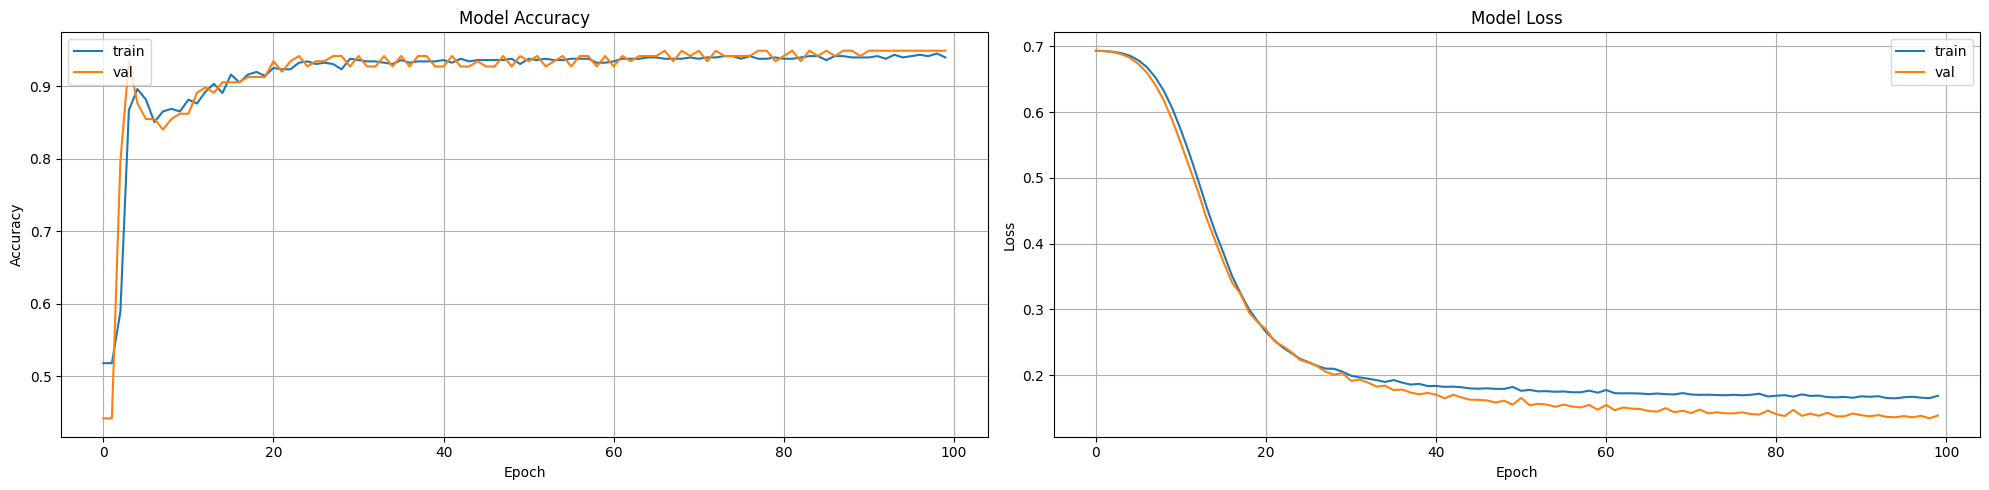

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot training and validation accuracy
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['train', 'val'], loc='upper left')
ax1.grid(True)

# Plot training and validation loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['train', 'val'], loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()


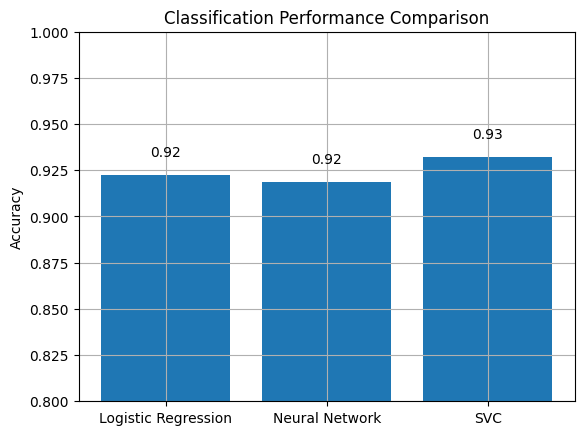

In [285]:
from sklearn.metrics import accuracy_score

# Create a bar chart to compare the performance of the two models
logreg_acc = accuracy_score(y_test, y_pred_logreg_test)
ann_acc = accuracy_score(y_test, y_pred_ann_test)
svc_acc = accuracy_score(y_test, y_pred_svc_test)
labels = ['Logistic Regression', 'Neural Network', 'SVC']
values = [logreg_acc, ann_acc, svc_acc]
plt.bar(labels, values)

# Add labels to the edge of the bars
for i, v in enumerate(values):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')

plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Classification Performance Comparison')
plt.grid()
plt.show()

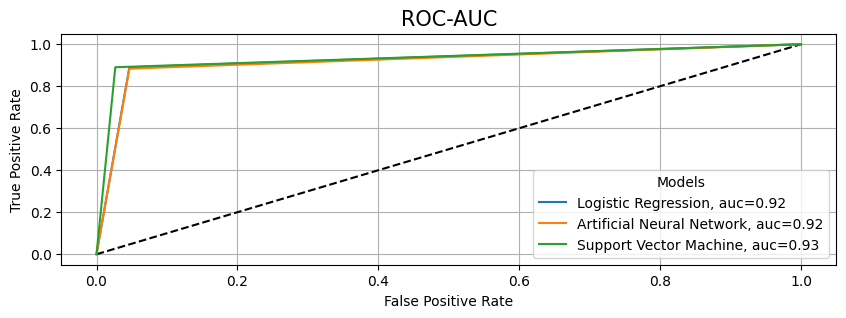

In [288]:
# Logistic Regression
fp1, tp1, _ = metrics.roc_curve(y_test,  y_pred_logreg_test)
auc1 = metrics.roc_auc_score(y_test, y_pred_logreg_test)

# Artificial Neural Network
fp2, tp2, _ = metrics.roc_curve(y_test,  y_pred_ann_test)
auc2 = metrics.roc_auc_score(y_test, y_pred_ann_test)

# Support Vector Machine
fp3, tp3, _ = metrics.roc_curve(y_test,  y_pred_svc_test)
auc3 = metrics.roc_auc_score(y_test, y_pred_svc_test)

# display as plot
plt.figure(figsize=(10,3))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fp1,tp1,label="Logistic Regression, auc="+str(round(auc1,2)))
plt.plot(fp2,tp2,label="Artificial Neural Network, auc="+str(round(auc2,2)))
plt.plot(fp3,tp3,label="Support Vector Machine, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='White')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC', size=15)
plt.grid()
plt.box(True)

``Conclusion :``  

We have evaluated the performance of three different machine learning algorithms on a binary classification task. The algorithms considered were Neural Network, Logistic Regression, and SVM.

After training and testing each of the models, we obtained the following accuracy values:

1. Neural Network: 0.94 train accuracy and 0.92 test accuracy
2. Logistic Regression: 0.95 train accuracy and 0.92 test accuracy
3. SVM: 0.94 train accuracy and 0.93 test accuracy

With test accuracies ranging from 0.92 to 0.93, all three algorithms performed well. The Logistic Regression algorithm, on the other hand, had the highest train accuracy value of 0.95, indicating that it performed the best on the training set.

The SVM algorithm performed best in terms of test accuracy, with a score of 0.93, indicating that it generalized better to the test set. SVM is a good choice for datasets with small sample sizes because it works well even when the number of features exceeds the number of samples.

When compared to the other two models, the Neural Network had slightly lower accuracy values, indicating that it may not be the best choice for this specific problem. However, Neural Networks can be useful for complex tasks and large datasets, and they may be worth investigating further as dataset size and complexity grow.

Finally, the best algorithm is determined by a number of factors, including the specific problem domain, the size and quality of the dataset, and the computational resources available. SVM would be the best choice for this problem based solely on the accuracy values. However, before making a final decision, it is critical to evaluate the models using multiple metrics and to consider other factors such as interpretability and computational efficiency.



# **6. Clustering Algorithm**

In fraud detection, the goal of clustering is to identify groups or clusters of transactions that exhibit similar patterns or behaviors that may be indicative of fraudulent activity. 

Transactions that do not fit well into any of the clusters can be found using clustering and may be outliers or anomalies that need to be looked into further.  

Clustering can assist in identifying common patterns and behaviors among fraudulent transactions, such as unusually high transaction volumes, transactions from unusual sources, and transactions involving unusual goods or services.

In [49]:
# Clustering Algorithm
!pip install kneed
from sklearn import metrics
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Scaling

To find pattern of the data in clustering, we will use the original dataset and scale it with MinMaxScaler, so the number is 0 to 1.

In [50]:
df_scaled2 = pd.DataFrame(np.concatenate([df_us[['Class']], 
                                         pd.DataFrame(MinMaxScaler().fit_transform(df_us.drop('Class', axis=1)))], 
                                        axis=1), 
                         columns=['Class']+df_us.drop('Class', axis=1).columns.tolist())

df_scaled2.Class = df_scaled2.Class.astype(int)
df_scaled2 = df_scaled2.drop('index', axis=1)

In [51]:
df_scaled2

,Class,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.06,0.89,0.37,0.95,0.16,0.66,0.43,0.89,0.67,0.80,0.83,0.38,0.81,0.88,0.86,0.50,0.85,0.78,0.72,0.34,0.39,0.45,0.50,0.71,0.52,0.65,0.47,0.70,0.57,0.01
1,0,0.46,0.68,0.53,0.70,0.29,0.53,0.37,0.79,0.77,0.66,0.83,0.00,1.00,0.78,1.00,0.67,0.89,0.85,0.74,0.47,0.33,0.46,0.52,0.74,0.36,0.71,0.23,0.61,0.43,0.00
2,0,0.34,0.97,0.34,0.90,0.30,0.66,0.49,0.87,0.67,0.71,0.83,0.24,0.90,0.45,0.84,0.69,0.85,0.76,0.77,0.43,0.36,0.46,0.54,0.69,0.36,0.79,0.27,0.67,0.51,0.01
3,0,0.42,0.97,0.32,0.89,0.14,0.65,0.42,0.87,0.67,0.77,0.79,0.29,0.93,0.45,0.85,0.77,0.81,0.77,0.73,0.56,0.36,0.45,0.49,0.70,0.44,0.75,0.27,0.67,0.51,0.01
4,0,0.31,0.98,0.30,0.88,0.12,0.66,0.55,0.86,0.67,0.60,0.88,0.21,0.87,0.72,0.81,0.65,0.81,0.79,0.74,0.46,0.35,0.45,0.51,0.70,0.17,0.78,0.31,0.67,0.51,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,0.98,0.87,0.37,0.77,0.35,0.62,0.34,0.86,0.68,0.60,0.64,0.35,0.63,0.33,0.53,0.68,0.65,0.65,0.61,0.47,0.44,0.47,0.50,0.73,0.39,0.76,0.51,0.70,0.55,0.13
980,1,0.98,0.97,0.37,0.75,0.33,0.68,0.39,0.85,0.68,0.65,0.72,0.40,0.74,0.40,0.60,0.54,0.69,0.69,0.65,0.50,0.38,0.46,0.52,0.70,0.43,0.76,0.50,0.71,0.56,0.00
981,1,0.98,0.91,0.37,0.83,0.27,0.63,0.50,0.83,0.69,0.68,0.71,0.33,0.75,0.46,0.65,0.53,0.73,0.63,0.66,0.45,0.38,0.47,0.56,0.71,0.44,0.58,0.43,0.70,0.57,0.02
982,1,0.99,0.84,0.35,0.74,0.36,0.64,0.27,0.83,0.69,0.63,0.65,0.34,0.65,0.35,0.55,0.65,0.67,0.64,0.59,0.42,0.38,0.47,0.50,0.69,0.41,0.64,0.47,0.75,0.44,0.08


## Principal Component Analysis

<Axes: >

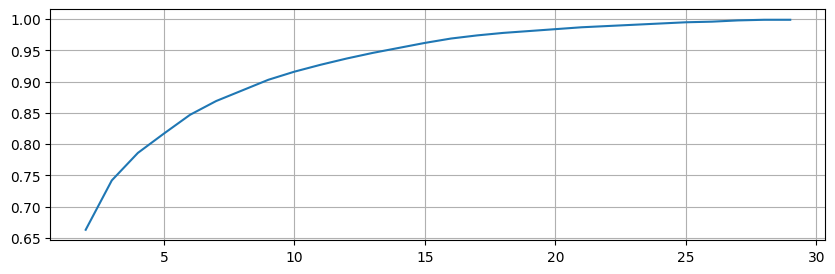

In [52]:
# PCA
var_ratio={}
c = range(2,30)
for n in c:
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df_scaled2)
    var_ratio[n] = sum(cr_pca.explained_variance_ratio_).round(3)

pd.Series(var_ratio).plot(figsize=(10,3), grid=True)

In [53]:
var_ratio

{2: 0.663,
 3: 0.742,
 4: 0.786,
 5: 0.817,
 6: 0.847,
 7: 0.869,
 8: 0.886,
 9: 0.903,
 10: 0.916,
 11: 0.927,
 12: 0.937,
 13: 0.946,
 14: 0.954,
 15: 0.962,
 16: 0.969,
 17: 0.974,
 18: 0.978,
 19: 0.981,
 20: 0.984,
 21: 0.987,
 22: 0.989,
 23: 0.991,
 24: 0.993,
 25: 0.995,
 26: 0.996,
 27: 0.998,
 28: 0.999,
 29: 0.999}

## DBSCAN with elbow method

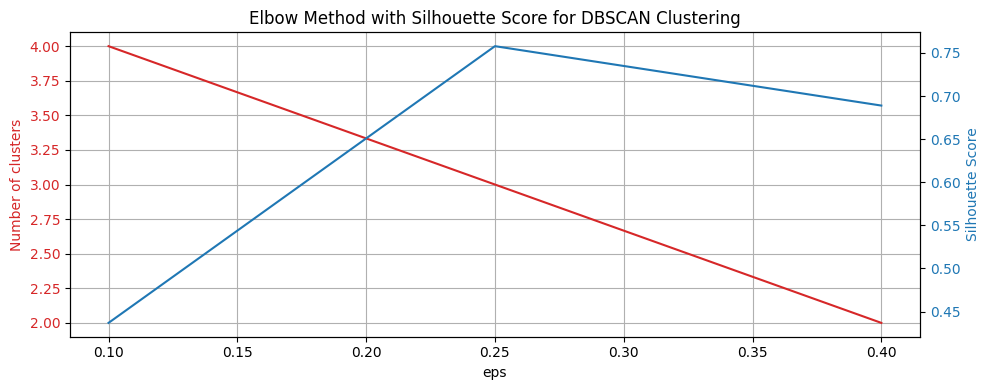

In [166]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# load the dataset
n_components = 2
XX = PCA(n_components = n_components).fit_transform(df_scaled2)
#XX = df_scaled.values

# initialize arrays to store results
eps_values = np.arange(0.1, 0.4, 0.15)
num_clusters = []
silhouette_scores = []

# loop over different values of eps and compute the number of clusters and silhouette score
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan.fit(XX)
    labels = dbscan.labels_
    num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    silhouette_scores.append(silhouette_score(XX, labels))

# plot the number of clusters and silhouette score as a function of eps
fig, ax1 = plt.subplots(figsize=(10, 4))
color = 'tab:red'
ax1.set_xlabel('eps')
ax1.set_ylabel('Number of clusters', color=color)
ax1.plot(eps_values, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(eps_values, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method with Silhouette Score for DBSCAN Clustering')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


The DBSCAN clustering algorithm was applied to a dataset with an epsilon value of 0.4, yielding two distinct clusters. The clustering Silhouette score was 0.7, indicating that the clusters were separated relatively well.  

The DBSCAN algorithm is a density-based clustering method that groups points that are closely packed together while identifying isolated or low-density points as outliers. In this case, an epsilon value of 0.4 was chosen to define the radius of each point's neighborhood, within which other points are considered to be part of the same cluster.

The clustering that resulted divided the dataset into two distinct groups, with a Silhouette score of 0.7 indicating that the clustering was relatively good. The Silhouette score, which ranges from -1 to 1, measures how similar each point is to its own cluster compared to other clusters. Higher Silhouette scores indicate well-defined clustering, whereas negative scores indicate less meaningful clustering.  

With a relatively good Silhouette score of 0.7, the DBSCAN algorithm with an epsilon value of 0.4 was able to successfully separate the dataset into two distinct clusters.

In [168]:
# cluster result
pd.DataFrame(labels).value_counts()

0    492
1    492
dtype: int64

In [169]:
# concatenate cluster result with original dataset
df_us3 = pd.concat([pd.DataFrame(labels, columns=['Cluster']), df_us], axis=1).drop('index', axis=1)

In [170]:
df_us3

,Cluster,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,10770.00,-1.46,1.06,1.74,-1.26,-0.09,-0.84,0.70,-0.25,1.64,0.19,2.63,-1.51,2.16,1.03,-0.92,0.56,-0.30,0.20,-0.75,0.42,-0.33,-0.21,0.01,0.52,-0.24,0.64,0.39,0.20,35.13,0
1,0,79526.00,-8.09,6.54,-6.74,0.81,-4.38,-1.62,-4.33,6.08,-0.93,0.31,-3.17,2.40,1.53,4.26,0.32,1.27,1.93,0.48,0.42,-0.55,0.41,0.15,0.84,-0.47,0.20,-0.33,-0.68,-0.31,4.74,0
2,0,58068.00,1.20,0.08,0.13,0.85,-0.06,-0.05,-0.11,0.05,0.03,0.18,0.41,0.27,-0.50,0.53,0.43,0.61,-0.99,0.93,0.11,-0.09,0.17,0.45,-0.29,-0.49,0.77,-0.17,0.01,0.01,29.38,0
3,0,72686.00,1.29,-0.30,-0.09,-1.60,-0.55,-1.06,-0.05,-0.13,1.01,-0.86,1.27,0.95,-0.54,0.67,1.02,-0.22,-0.45,0.32,1.24,-0.07,-0.15,-0.43,-0.03,0.01,0.44,-0.18,-0.02,0.00,18.00,0
4,0,52808.00,1.52,-1.09,-0.50,-1.88,-0.32,0.67,-0.92,0.05,-2.17,1.57,-0.02,-0.44,1.17,-0.20,0.13,-0.13,-0.08,0.51,0.33,-0.21,-0.16,-0.09,-0.26,-1.70,0.66,-0.00,0.03,-0.01,40.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,169142.00,-1.93,1.13,-4.52,1.75,-1.57,-2.01,-0.88,0.70,-2.06,-5.59,2.12,-5.42,-1.24,-6.67,0.40,-2.90,-4.57,-1.32,0.39,1.25,0.78,-0.32,0.64,-0.29,0.54,0.79,0.29,0.15,390.00,1
980,1,169347.00,1.38,1.29,-5.00,1.41,0.44,-1.33,-1.41,0.25,-1.13,-3.23,2.86,-3.10,-0.79,-5.21,-0.61,-2.16,-3.27,-0.69,0.74,0.23,0.37,0.03,-0.15,-0.08,0.52,0.74,0.39,0.19,0.76,1
981,1,169351.00,-0.68,1.13,-2.21,0.47,-1.12,-0.00,-2.23,1.21,-0.65,-3.46,1.79,-2.78,-0.42,-4.06,-0.71,-1.60,-5.04,-0.51,0.27,0.25,0.75,0.83,0.19,0.03,-0.74,0.47,0.39,0.19,77.89,1
982,1,169966.00,-3.11,0.59,-5.40,1.82,-0.84,-2.94,-2.21,1.06,-1.63,-5.25,1.93,-5.03,-1.13,-6.42,0.14,-2.55,-4.61,-1.48,-0.04,0.31,0.58,-0.27,-0.46,-0.18,-0.33,0.61,0.88,-0.25,245.00,1


## Gathering insight from cluster

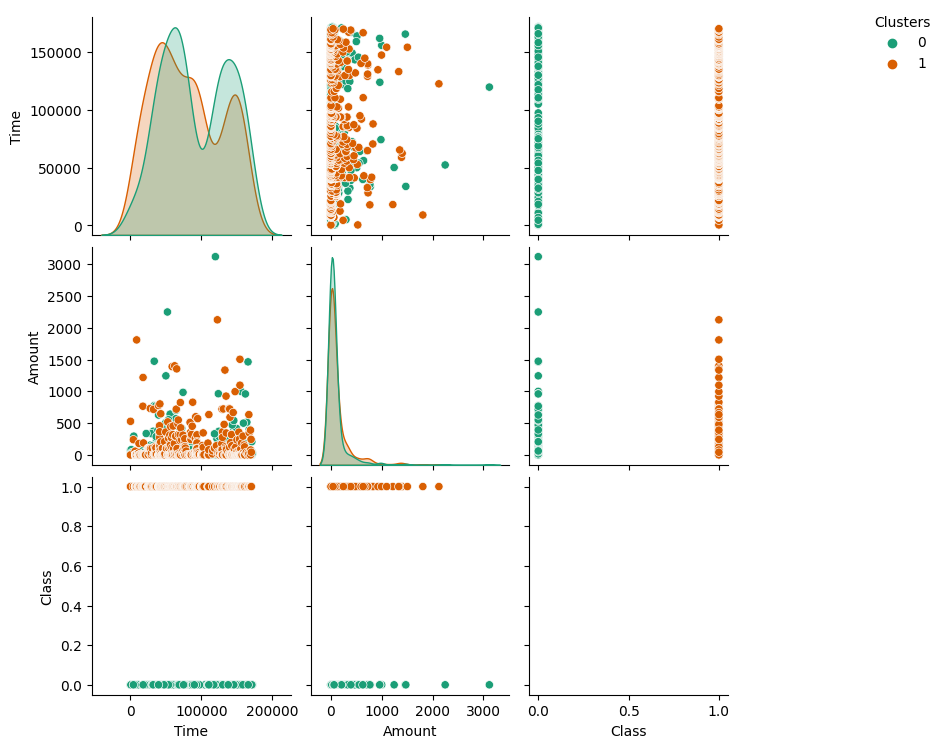

In [171]:
p = sns.pairplot(data=df_us3[['Time', 'Amount', 'Cluster', 'Class']], hue='Cluster', palette='Dark2')
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

<Axes: title={'center': 'Amount'}, xlabel='Class', ylabel='Amount'>

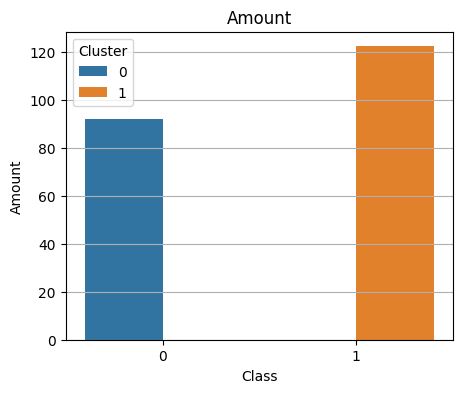

In [172]:
feat = ['Class', 'Cluster', 'Time', 'Amount']
plt.figure(figsize=(5,4))
plt.grid(True)
plt.title('Amount')
sns.barplot(data = df_us3[feat], x=df_us3[feat].Class, y=df_us3[feat].Amount, hue=df_us3[feat].Cluster, errorbar=None)

<Axes: title={'center': 'Time'}, xlabel='Class', ylabel='Time'>

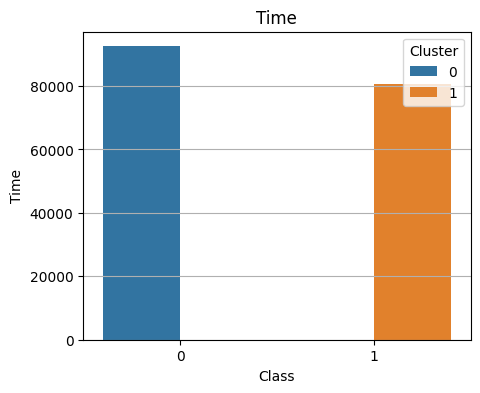

In [174]:
plt.figure(figsize=(5,4))
plt.grid(True)
plt.title('Time')
sns.barplot(data = df_us3[feat], x=df_us3[feat].Class, y=df_us3[feat].Time, hue=df_us3[feat].Cluster, errorbar=None)

In [133]:
df_us3[['Cluster', 'Time', 'Amount']].groupby('Cluster').mean()

,Time,Amount
Cluster,,
0,92513.43,91.90
1,88528.44,133.14
2,52747.47,82.88


In [132]:
df_us3.groupby('Cluster')[['Time', 'Amount']].mean()

,Time,Amount
Cluster,,
0,92513.43,91.90
1,88528.44,133.14
2,52747.47,82.88


In [85]:
df_us3[df_us3.Cluster == 0].Class.value_counts()

0    492
Name: Class, dtype: int64

In [86]:
df_us3[df_us3.Cluster == 1].Class.value_counts()

1    385
Name: Class, dtype: int64

In [87]:
df_us3[df_us3.Cluster == 2].Class.value_counts()

1    107
Name: Class, dtype: int64

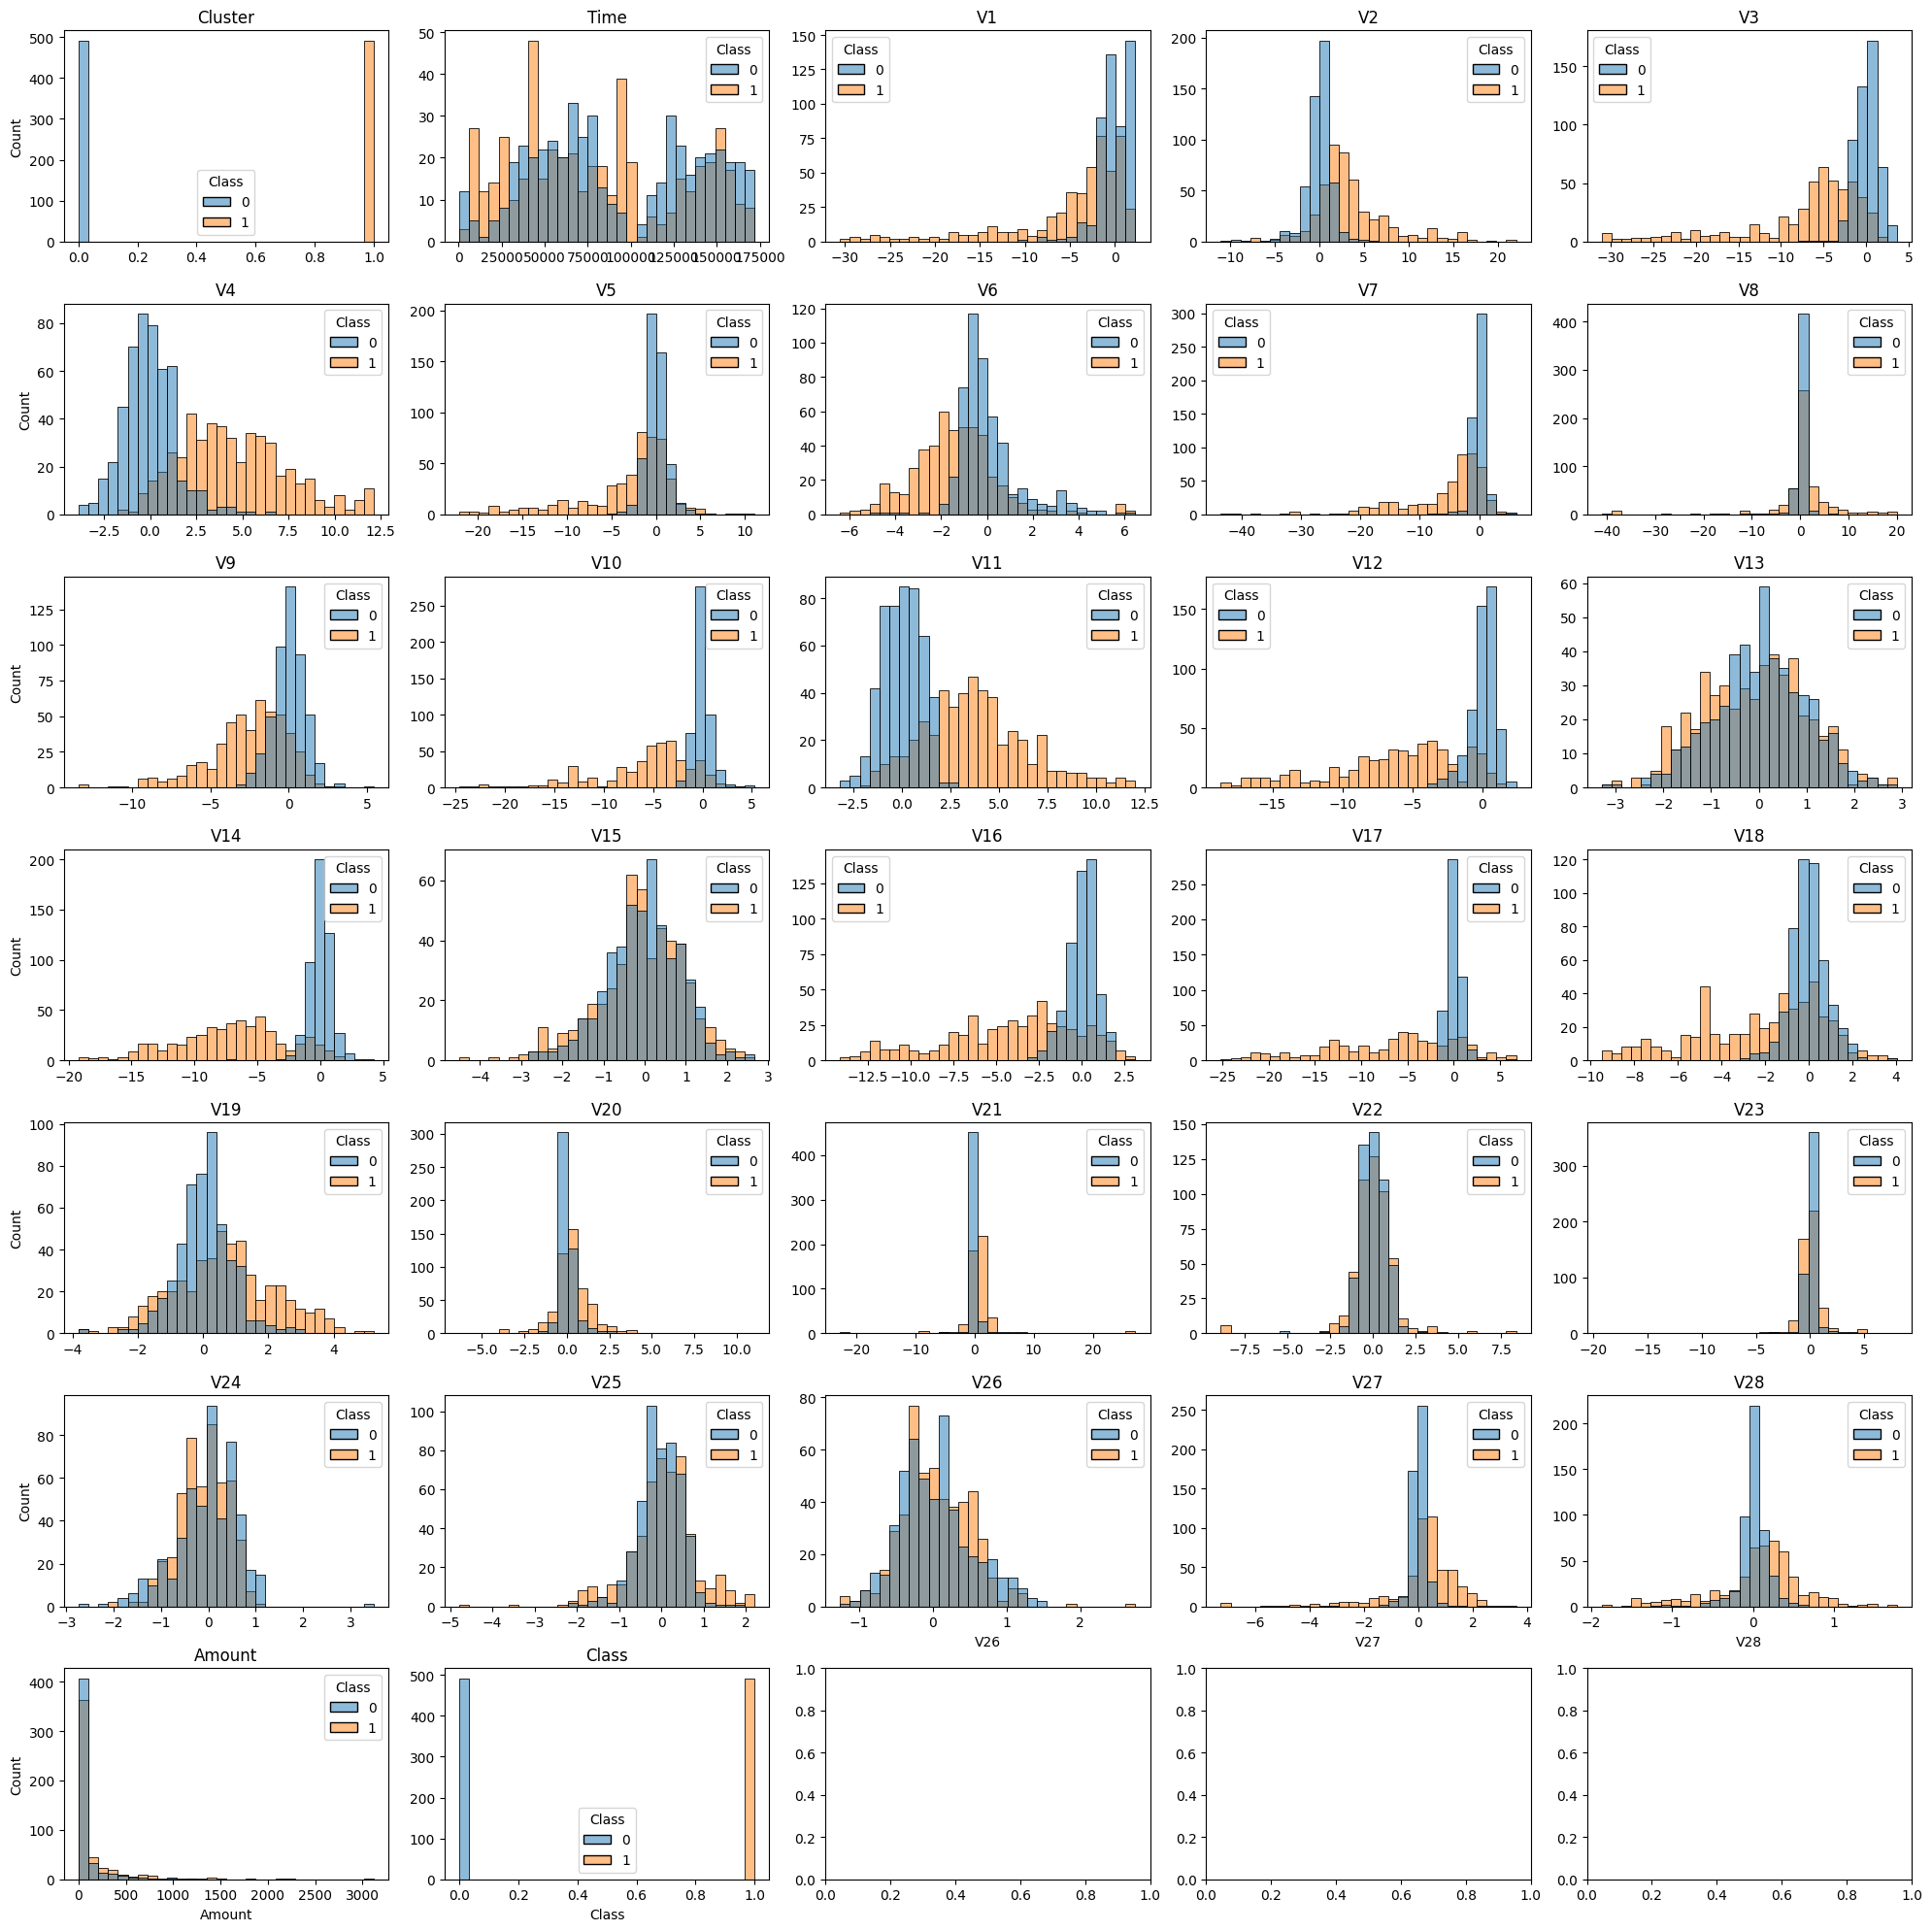

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with subplots
fig, axs = plt.subplots(nrows=7, ncols=5, figsize=(20, 20))

# Flatten axis for easy iteration
axs = axs.flatten()

# Loop through each feature and create histogram
for i, feature in enumerate(df_us3.columns.tolist()):
    
    # Plot histogram
    sns.histplot(data=df_us3, x=feature, hue='Class', kde=False, bins=30, ax=axs[i])
    
    # Set subplot title
    axs[i].set_title(f'{feature}')
    
    # Remove x-axis label for subplots not on the bottom row
    if i < 27:
        axs[i].set_xlabel('')
    
    # Remove y-axis label for subplots not on the left column
    if i % 5 != 0:
        axs[i].set_ylabel('')

# Adjust subplots spacing
fig.tight_layout()
plt.show()


In [276]:
# range distribution of variable cluster 0
cluster_0_variable_range = df_us3[df_us3.Cluster == 0].drop(['Cluster', 'Time', 'Amount', 'Cluster','Class'], axis=1).describe().T[['min', 'max']].reset_index()
cluster_0_variable_range['var_range_cl_0'] = cluster_0_variable_range['max'] - cluster_0_variable_range['min']

# range distribution of variable cluster 1
cluster_1_variable_range = df_us3[df_us3.Cluster == 1].drop(['Cluster', 'Time', 'Amount', 'Cluster', 'Class'], axis=1).describe().T[['min', 'max']].reset_index()
cluster_1_variable_range['var_range_cl_1'] = cluster_1_variable_range['max'] - cluster_1_variable_range['min']

In [283]:
# range distribution of variable cluster 0
cluster_0_variable_range.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
min,-9.96,-11.03,-7.23,-3.87,-5.41,-4.98,-7.82,-16.96,-3.33,-2.69,-3.17,-3.68,-3.29,-7.10,-2.76,-2.94,-1.71,-3.19,-3.82,-6.34,-6.49,-5.38,-3.33,-2.74,-2.03,-1.26,-3.00,-1.17
max,2.30,6.54,3.62,6.60,8.39,6.17,6.23,6.08,5.44,5.26,2.68,2.40,2.88,4.26,2.67,2.65,5.90,4.03,3.10,6.11,16.67,2.98,8.04,3.49,1.85,1.50,3.59,0.58
var_range_cl_0,12.26,17.57,10.86,10.47,13.81,11.15,14.05,23.04,8.77,7.96,5.84,6.08,6.17,11.36,5.42,5.58,7.61,7.21,6.92,12.45,23.15,8.36,11.38,6.23,3.88,2.76,6.59,1.75


In [284]:
# range distribution of variable cluster 1
cluster_1_variable_range.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
min,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,-24.59,-1.70,-18.68,-3.13,-19.21,-4.50,-14.13,-25.16,-9.50,-3.68,-4.13,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87
max,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,4.03,12.02,1.38,2.82,3.44,2.47,3.14,6.74,3.79,5.23,11.06,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78
var_range_cl_1,32.68,30.46,33.35,13.43,33.20,12.88,49.36,61.05,16.79,28.62,13.72,20.06,5.94,22.66,6.97,17.27,31.90,13.29,8.91,15.19,50.00,17.25,24.72,3.12,6.99,3.90,10.32,3.65


In [279]:
# concatenate both variable range into a dataframe
var_range_comparison = pd.concat([cluster_0_variable_range[['index', 'var_range_cl_0']], cluster_1_variable_range[['var_range_cl_1']]], axis=1)

In [280]:
var_range_comparison.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
index,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
var_range_cl_0,12.26,17.57,10.86,10.47,13.81,11.15,14.05,23.04,8.77,7.96,5.84,6.08,6.17,11.36,5.42,5.58,7.61,7.21,6.92,12.45,23.15,8.36,11.38,6.23,3.88,2.76,6.59,1.75
var_range_cl_1,32.68,30.46,33.35,13.43,33.20,12.88,49.36,61.05,16.79,28.62,13.72,20.06,5.94,22.66,6.97,17.27,31.90,13.29,8.91,15.19,50.00,17.25,24.72,3.12,6.99,3.90,10.32,3.65


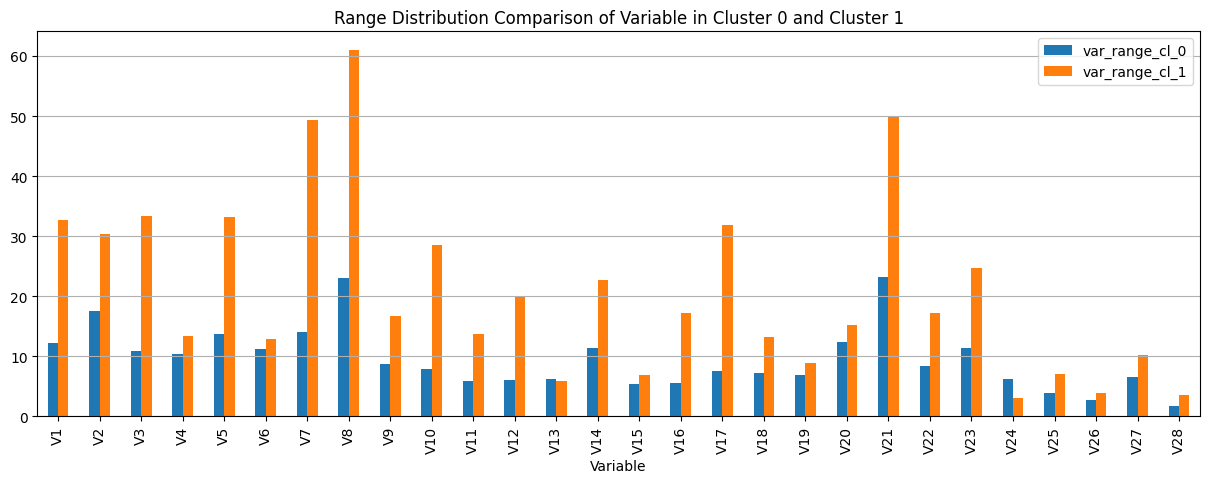

In [281]:
# Plot the DataFrame as a bar chart
ax = var_range_comparison.plot(kind='bar', figsize=(15, 5), grid=True, title='Range Distribution Comparison of Variable in Cluster 0 and Cluster 1', x='index')

# Show only horizontal grid lines
ax.grid(axis='x')

# x-axis lable
ax.set_xlabel('Variable')

# Show the plot
plt.show()


``Conclusion :``  

There could be several reasons why the fraudulent class has a wider range of numeric features than the non-fraudulent class. Here are a few possibilities:  

1. The fraudulent transactions may involve larger sums of money than the non-fraudulent ones, leading to a wider range of values for the numeric features.  

2. More complicated financial maneuvers, such as multiple transfers or transactions involving different currencies or nations, may be part of fraudulent transactions, which call for a wider range of values for the numeric features.  

3. To make their transactions appear more legitimate, fraudsters may purposefully manipulate the values of the numeric features, which could lead to a wider range of values for those features.  

4. There might simply be a wider range of values for the numeric features because the fraudulent class contains more outliers than the non-fraudulent class does.